In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### 1) Importing Dataset

In [10]:
df = pd.read_csv("crime_data.csv")
df=df.rename({'Unnamed: 0':'States'},axis=1)
df

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### 2) Performing Descriptive Analysis

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### 3) Checking Data Type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### 4) Checking for Null and Duplicate Values

In [13]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [15]:
df.duplicated().sum()

0

### 5) Performing EDA

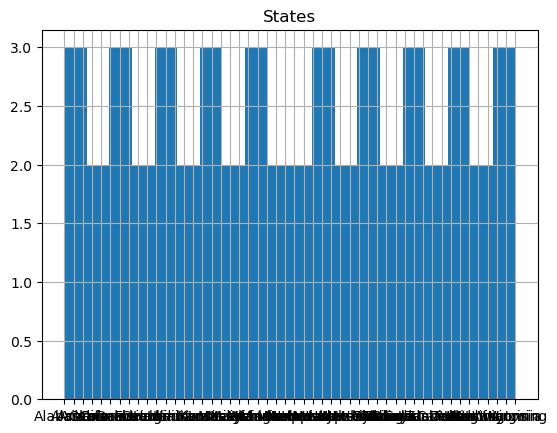

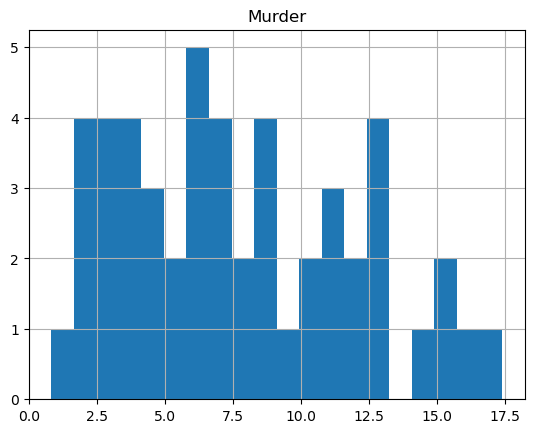

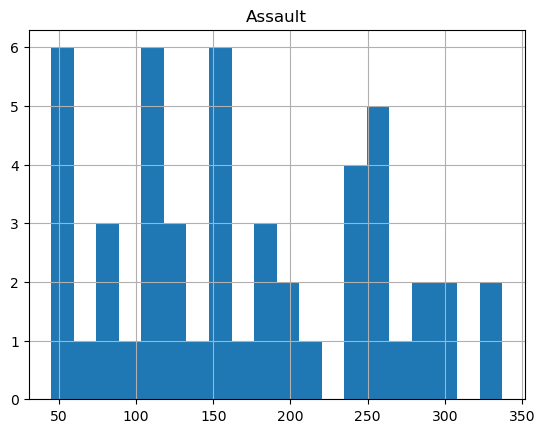

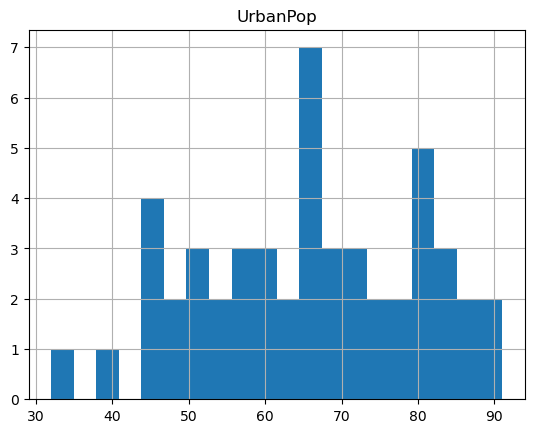

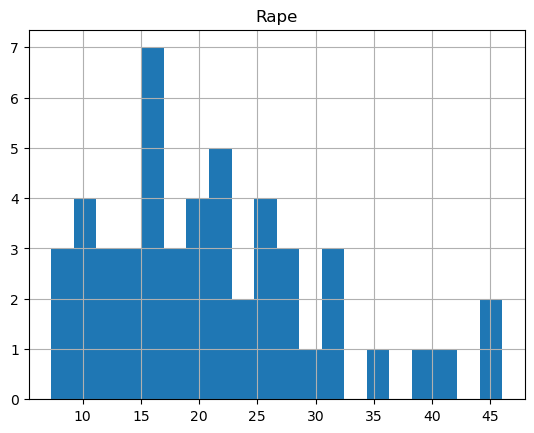

In [23]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.title(feature)
    plt.show()

### 6) Performing Outlier Detection

In [1]:
data2=df.copy() 
fig, axes=plt.subplots(5,1,figsize=(16,12),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=data2,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=data2,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=data2,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=data2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

NameError: name 'df' is not defined

### 7) Hierarchy Clustering

In [30]:
MS = MinMaxScaler()
df1= MS.fit_transform(df.iloc[:,1:].to_numpy())
df2 = pd.DataFrame(df1, columns = df.columns[1:])
df2.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


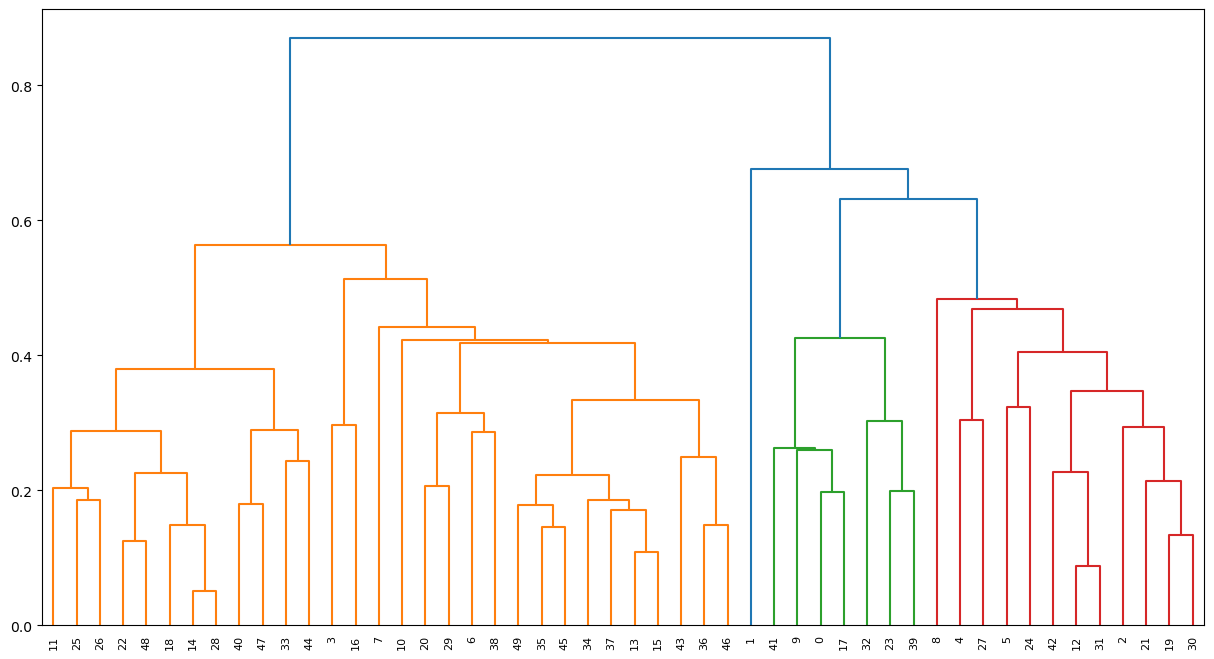

In [33]:
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df2, method='average'))

In [34]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [36]:
y_hc = hc.fit_predict(df2)
Clusters= pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,2
2,1
3,0
4,1


In [38]:
df3 = pd.concat([df,Clusters],axis=1)
df3.head()

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [39]:
df3.sort_values("Clusters").reset_index()

,index,States,Murder,Assault,UrbanPop,Rape,Clusters
0,49,Wyoming,6.8,161,60,15.6,0
1,28,New Hampshire,2.1,57,56,9.5,0
2,34,Ohio,7.3,120,75,21.4,0
3,26,Nebraska,4.3,102,62,16.5,0
4,25,Montana,6.0,109,53,16.4,0
5,48,Wisconsin,2.6,53,66,10.8,0
6,35,Oklahoma,6.6,151,68,20.0,0
7,22,Minnesota,2.7,72,66,14.9,0
8,36,Oregon,4.9,159,67,29.3,0
9,20,Massachusetts,4.4,149,85,16.3,0


In [40]:
df3['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

### 8) K-Means

In [42]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(df2)

KMeans(n_clusters=4, random_state=0)

In [43]:
kmeans.inertia_

3.683456153585914

In [44]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

In [45]:
wcss

[13.184122550256445,
 6.596893867946196,
 5.010878493006417,
 3.683456153585914,
 3.22507225604479,
 2.8520398885211113,
 2.584866411431045]

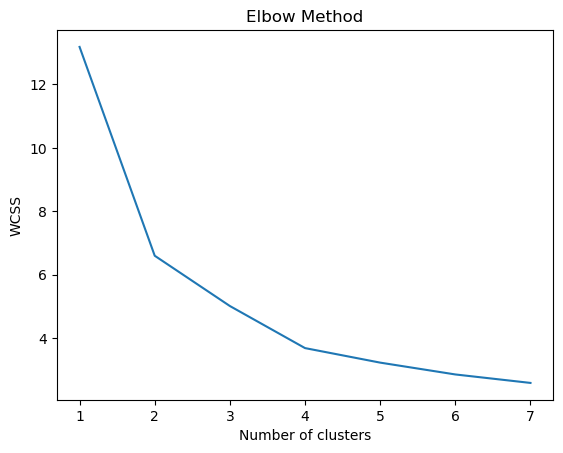

In [47]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
Clusters2 = KMeans(4, random_state=8)
Clusters2.fit(df2)

KMeans(n_clusters=4, random_state=8)

In [50]:
Clusters2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [72]:
df4 = pd.DataFrame(Clusters2.labels_, columns =['Clusters'])

In [73]:
df5 = pd.concat([df,df4], axis=1)
df5.head()

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [75]:
df5['Clusters'].value_counts()

0    17
2    13
3    12
1     8
Name: Clusters, dtype: int64

In [76]:
df5.groupby('Clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Clusters,,,,
0,5.852941,141.176471,73.647059,19.335294
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,10.966667,264.000000,76.500000,33.608333


### 9) DBSCAN

In [61]:
values = df2.values
values

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [64]:
stdscaler = StandardScaler().fit(values)
x1 = stdscaler.transform(values)

In [65]:
x1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [66]:
dbscan = DBSCAN(eps=0.98, min_samples=3)
dbscan.fit(x1)

DBSCAN(eps=0.98, min_samples=3)

In [67]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [81]:
Clusters3 = pd.DataFrame(dbscan.labels_,columns=['Clusters'])

In [78]:
df6 = pd.concat([df,Clusters3],axis=1)
df6

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [80]:
df6['Clusters'].value_counts()

 1    26
-1    12
 0     6
 2     3
 3     3
Name: Clusters, dtype: int64